---

<h1><center>SDSE Homework 3 <br><br> Problem 2: Principal Components Analysis </center></h1>

---

In this problem we will use principal components analysis to reduce the number of columns in a data matrix. 

In [37]:
result = {
    'SID': 3036429331 # enter your SID
}

In [38]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

The data consists of N=100 samples of a D=16-dimensional random variable. The samples are iid. Our task is to find a linear combination of the variables that captures most of the variance of the distribution. The next cell loads the data and extracts its dimensions. 

In [39]:
with open('data_prob2.pickle','rb') as file:
    X = pickle.load(file)
    
N = X.shape[0]
D = X.shape[1]

# Seaborn pairplot

Seaborn is a plotting package similar to matplotlib. We won't use it much, but it is pretty popular. One nice thing is its `pairplot` function, which is a visualization of the sample covariance matrix. The plot is a 16x16 grid of subplots, in this case because D=16. Below we see the upper-left 4x4 block. The diagonals are histograms of each of the 16 variables. The off-diagonals are scatter plots of the respective column pairs. Here we can see, for example, that:
+ x0 and x1 are negatively correlated
+ x0 and x2 are uncorrelated
+ x1 and x3 are positevely correlated 

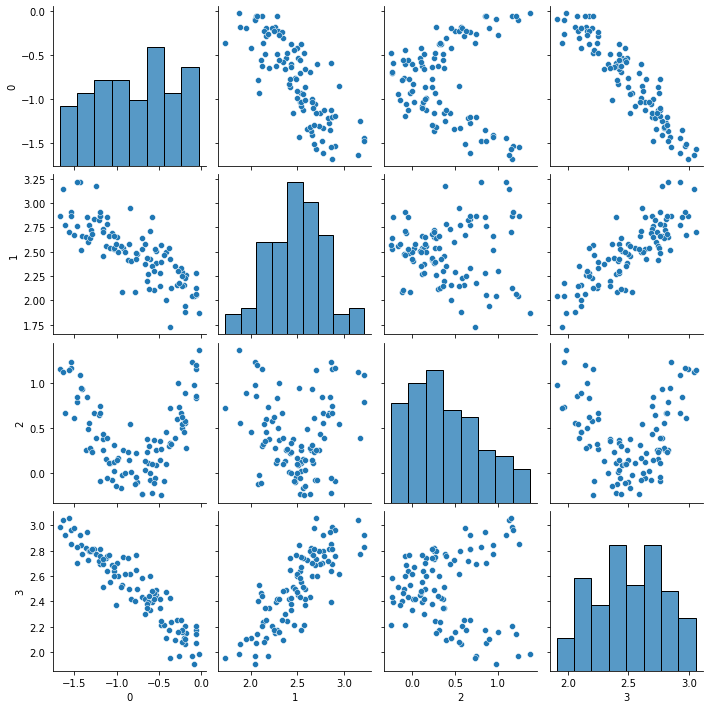

In [40]:
Xdf = pd.DataFrame(X)
sns.pairplot(Xdf.iloc[:,:4])

# Sample covariance matrix
`np.corrcoef` computes the sample correlation matrix for a matrix. Use it to compute the 16x16 sample correlation matrix for `X`, and then use `plt.imshow` to visualize the upper-left 4x4 corner (corresponding to the seaborn plot above). Notice how the colors relate to the correlations we noted in the previous part. (0 pts)

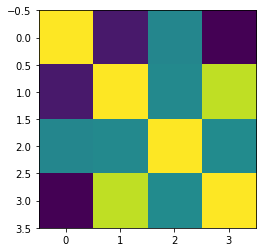

In [41]:
cov = np.corrcoef(X.T) # 16x16

# Add your code here
plt.imshow(cov[:4, :4])

# 1. Center and normalize the data (2 pts)
Subtract the mean of each column from `X` and record this new matrix to `Xc`. THis can be accomplished with one line of code. 

In [42]:
Xc = X - X.mean(axis=0)  # Add your code here

In [43]:
################################
# Reporting. Do not modify.#####
result['Xc'] = Xc
################################

# 2. Run SVD on Xc
This has been done for you in the next cell.

In [44]:
U, s, Vt = np.linalg.svd(Xc)

# 3. Plot the singular values in order (4 pts)
Use `plt.plot` (a semilogy plot is not needed in this case)

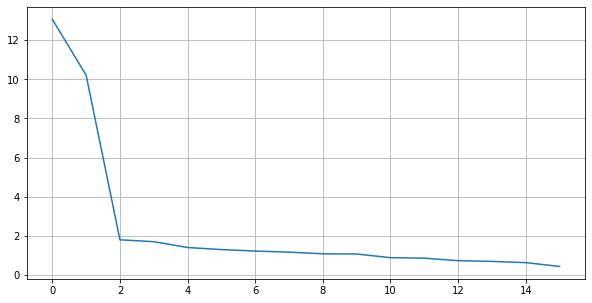

In [45]:
fig3 = plt.figure(figsize=(10,5))

# Add your code here
plt.plot(s)
plt.grid()

In [46]:
################################
# Reporting. Do not modify.#####
result['fig3'] = fig3
################################

# 4. Plot the total variantion explained as a function of the number of dimensions. (4 pts)
The total variation explained by the rank `r` approximation of `Xc` is the sum of the first `r` singular values. 

Text(0, 0.5, 'Variance preserved')

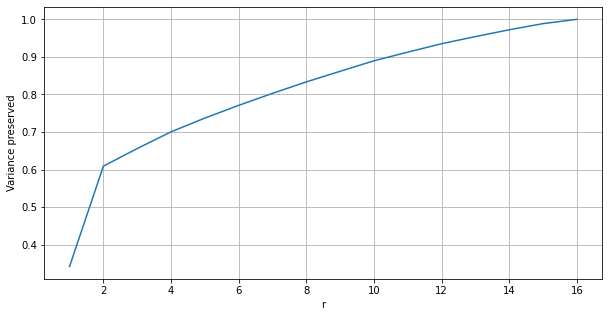

In [47]:
fig4 = plt.figure(figsize=(10,5))

# Add your code here
x = np.linspace(1, len(s), len(s))
y = np.cumsum(s) / s.sum()
plt.plot(x, y)
plt.grid()
plt.xlabel('r')
plt.ylabel('Variance preserved')

In [48]:
################################
# Reporting. Do not modify.#####
result['fig4'] = fig4
################################

# 5. Compute Ur, sr, and Vhr for r=2. (4 pts)
Save these to `Ur`, `sr`, and `Vhr`

In [49]:
r = 2
Ur = U[:, :r]  # Add your code here
sr = s[:r]  # Add your code here
Vtr = Vt[:r, :]  # Add your code here

In [50]:
################################
# Reporting. Do not modify.#####
result['Ur'] = Ur
result['sr'] = sr
result['Vhr'] = Vtr
################################

# Compute the optimal two-column representation of X (4 pts)
Save it to Xr

In [51]:
Xr = Ur@np.diag(sr)  # Add your code here

In [52]:
################################
# Reporting. Do not modify.#####
result['Xr'] = Xr
################################

---
## Do not modify below this

In [53]:
with open('hw3_prob2_{}.pickle'.format(result['SID']),'wb') as file:
    pickle.dump(result,file)